In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('./Financial_Services_mod.csv')

# Replace null values with 0
df.fillna(0, inplace=True)

# Print the data
print(df)

             Date      Symbol Series  Prev Close     Open     High      Low  \
0      2015-01-01        SBIN     EQ      311.85   312.45   315.00   310.70   
1      2015-01-02        SBIN     EQ      314.00   314.35   318.30   314.35   
2      2015-01-05        SBIN     EQ      315.25   316.25   316.80   312.10   
3      2015-01-06        SBIN     EQ      312.75   310.00   311.10   298.70   
4      2015-01-07        SBIN     EQ      299.90   300.00   302.55   295.15   
...           ...         ...    ...         ...      ...      ...      ...   
14089  2021-04-26  BAJFINANCE     EQ     4667.80  4690.00  4829.00  4690.00   
14090  2021-04-27  BAJFINANCE     EQ     4736.55  4747.00  4889.85  4746.55   
14091  2021-04-28  BAJFINANCE     EQ     4865.05  4915.00  5310.00  4915.00   
14092  2021-04-29  BAJFINANCE     EQ     5280.90  5350.00  5525.00  5330.00   
14093  2021-04-30  BAJFINANCE     EQ     5484.85  5350.00  5524.65  5327.70   

         Last    Close     VWAP    Volume      Turn

In [3]:

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [4]:
# Function for calculating the metrics of a model trained on a particular stock in the sector.
def stockMetrics(y_test, predictions):
    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100
    
    return mse, rmse, mae, nrmse, actual_growth, predicted_growth

In [5]:
# Function for plotting the Actual vs Predicted Growth of each stock in a sector.
def stockActVsPred(stock_df, y_test, predictions):
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()

Epoch 1/10
30/30 [==============================] - 6s 58ms/step - loss: 0.0253 - val_loss: 0.0224
Epoch 2/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0043 - val_loss: 0.0173
Epoch 3/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0032 - val_loss: 0.0147
Epoch 4/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0031 - val_loss: 0.0148
Epoch 5/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0028 - val_loss: 0.0143
Epoch 6/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0026 - val_loss: 0.0148
Epoch 7/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0027 - val_loss: 0.0141
Epoch 8/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0026 - val_loss: 0.0135
Epoch 9/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0023 - val_loss: 0.0140
Epoch 10/10
8/8 [==============================] - 1s 9ms/step
Metrics of HDFCBANK:
MSE: 8596.66489948573, RM

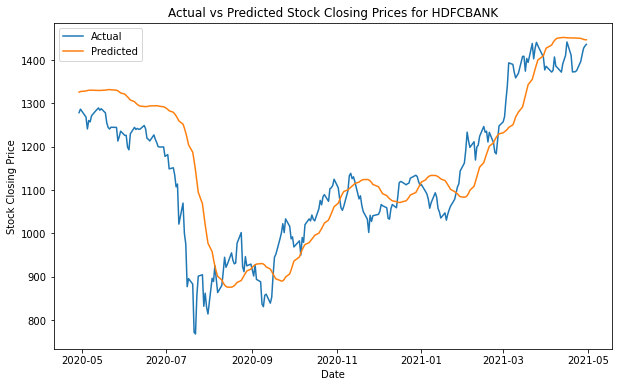

Epoch 1/10
30/30 [==============================] - 6s 64ms/step - loss: 0.0045 - val_loss: 0.0214
Epoch 2/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0016 - val_loss: 0.0184
Epoch 3/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0015 - val_loss: 0.0086
Epoch 4/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 0.0090
Epoch 5/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0013 - val_loss: 0.0091
Epoch 6/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 7/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 8/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 9/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0010 - val_loss: 0.0033
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of ICICIBANK:
MSE: 2515.1200669482564

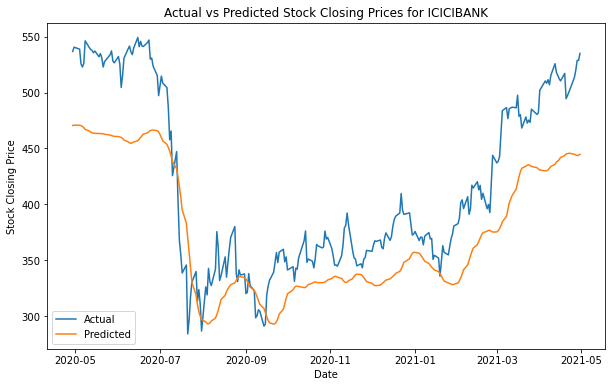

Epoch 1/10
30/30 [==============================] - 6s 57ms/step - loss: 0.0464 - val_loss: 0.0137
Epoch 2/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0080 - val_loss: 0.0041
Epoch 3/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 4/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 5/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 6/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 7/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0047 - val_loss: 0.0060
Epoch 8/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 9/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 10/10
8/8 [==============================] - 1s 12ms/step
Metrics of INDUSINDBK:
MSE: 15218.92766676044

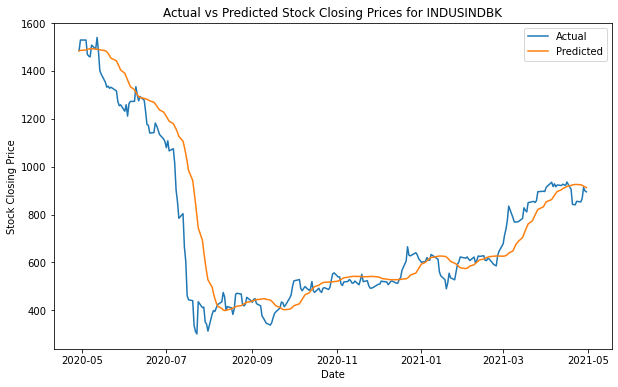

Epoch 1/10
30/30 [==============================] - 6s 58ms/step - loss: 0.0076 - val_loss: 0.0034
Epoch 2/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0018 - val_loss: 0.0067
Epoch 3/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0015 - val_loss: 0.0050
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 6/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 7/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 8/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 9/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0011 - val_loss: 0.0066
Epoch 10/10
8/8 [==============================] - 1s 9ms/step
Metrics of BAJAJFINSV:
MSE: 693272.7925199248,

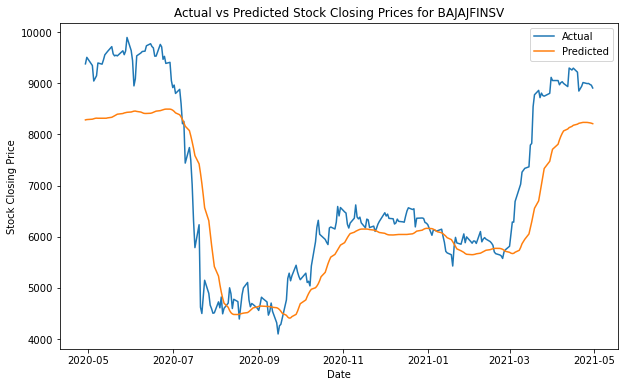

Epoch 1/10
30/30 [==============================] - 6s 63ms/step - loss: 0.0231 - val_loss: 0.0696
Epoch 2/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0055 - val_loss: 0.0359
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0046 - val_loss: 0.0251
Epoch 4/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0041 - val_loss: 0.0091
Epoch 5/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0037 - val_loss: 0.0131
Epoch 6/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0034 - val_loss: 0.0089
Epoch 7/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0036 - val_loss: 0.0145
Epoch 8/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0032 - val_loss: 0.0206
Epoch 9/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0031 - val_loss: 0.0140
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of AXISBANK:
MSE: 2934.7214324403553,

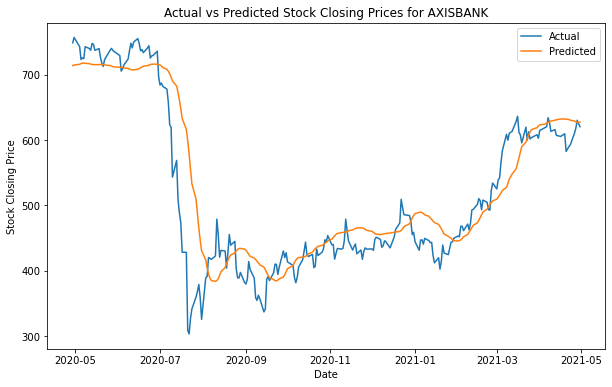

Epoch 1/10
30/30 [==============================] - 6s 63ms/step - loss: 0.0136 - val_loss: 0.0243
Epoch 2/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0026 - val_loss: 0.0074
Epoch 3/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 4/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 5/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 7/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 8/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 9/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of HDFC:
MSE: 19700.742444057592, RMS

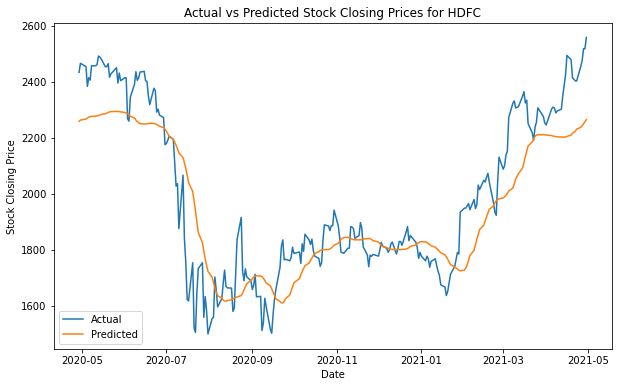

Epoch 1/10
30/30 [==============================] - 6s 58ms/step - loss: 0.0175 - val_loss: 2.9788e-04
Epoch 2/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0080 - val_loss: 0.0027
Epoch 3/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0074 - val_loss: 0.0033
Epoch 4/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0071 - val_loss: 0.0047
Epoch 5/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0064 - val_loss: 0.0013
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0058 - val_loss: 0.0020
Epoch 7/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0053 - val_loss: 2.1684e-04
Epoch 8/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 9/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0053 - val_loss: 4.7634e-04
Epoch 10/10
8/8 [==============================] - 2s 16ms/step
Metrics of BAJFINANCE:
MSE: 12798

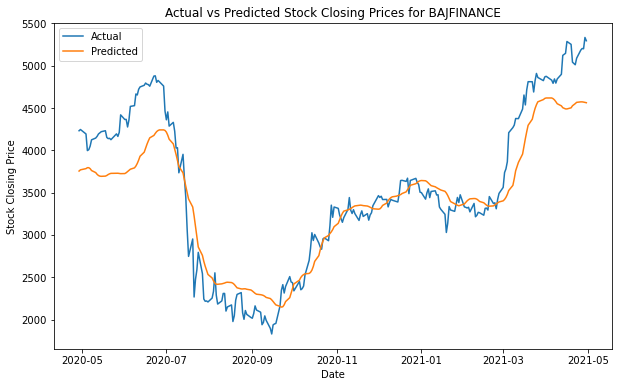

Epoch 1/10
30/30 [==============================] - 6s 70ms/step - loss: 0.0132 - val_loss: 0.0147
Epoch 2/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 3/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 4/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0027 - val_loss: 0.0073
Epoch 5/10
30/30 [==============================] - 1s 39ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 6/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 7/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 8/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0026 - val_loss: 0.0049
Epoch 9/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of KOTAKBANK:
MSE: 14652.394010769642

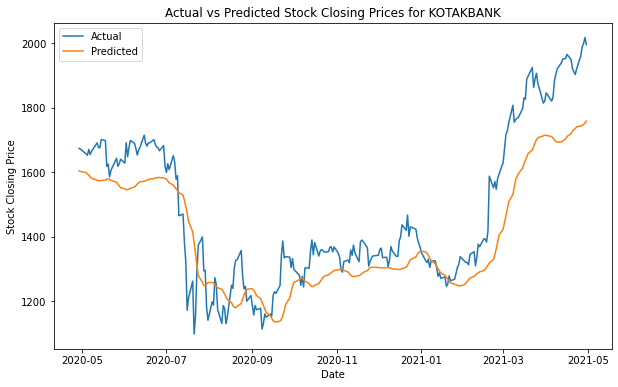

Epoch 1/10
30/30 [==============================] - 7s 77ms/step - loss: 0.0310 - val_loss: 0.0246
Epoch 2/10
30/30 [==============================] - 2s 55ms/step - loss: 0.0064 - val_loss: 0.0141
Epoch 3/10
30/30 [==============================] - 1s 47ms/step - loss: 0.0050 - val_loss: 0.0090
Epoch 4/10
30/30 [==============================] - 1s 44ms/step - loss: 0.0045 - val_loss: 0.0058
Epoch 5/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 6/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 7/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 8/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 9/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0040 - val_loss: 0.0064
Epoch 10/10
8/8 [==============================] - 1s 13ms/step
Metrics of SBIN:
MSE: 445.43285575424835, RMS

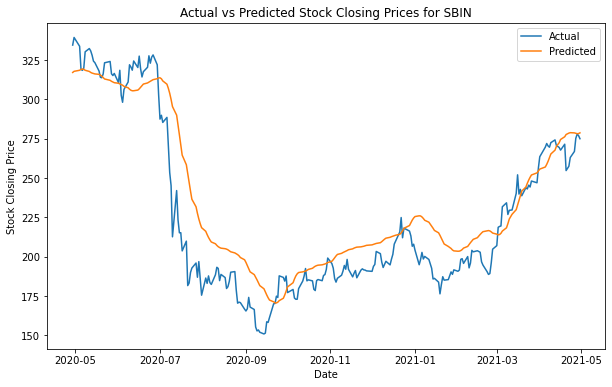

"for symbol, metrics in stock_metrics.items():\n    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')"

In [6]:
# Calculate rolling mean and standard deviation for the 'Close' column
df['50_day_mean'] = df['Close'].rolling(window=50).mean()
df['200_day_mean'] = df['Close'].rolling(window=200).mean()
df['50_day_std'] = df['Close'].rolling(window=50).std()
df['200_day_std'] = df['Close'].rolling(window=200).std()

# Drop rows with NaN values resulting from rolling calculations
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Close', '50_day_mean', '200_day_mean', '50_day_std', '200_day_std']
target = 'Close'

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Dictionary to store metrics for each stock
stock_metrics = {}

# Process each stock
for symbol in df['Symbol'].unique():
    stock_df = df[df['Symbol'] == symbol].copy()
    
    # Scale features
    scaled_features = scaler.fit_transform(stock_df[features])
    scaled_target = scaler.fit_transform(stock_df[[target]])
    
    X, y = [], []
    dates = []  # List to store the corresponding dates for X and y
    time_steps = 30
    for i in range(time_steps, len(stock_df)):
        X.append(scaled_features[i-time_steps:i])
        y.append(scaled_target[i])
        dates.append(stock_df['Date'].iloc[i])  # Store the corresponding date
        
    X=np.array(X)
    y=np.array(y)
    
    # Convert dates list to a NumPy array for easier indexing
    dates = np.array(dates)
    
    '''# Create sequences
    def create_dataset(X, y, time_steps=1):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            Xs.append(X[i:(i + time_steps)])
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)

    time_steps = 30
    X, y = create_dataset(scaled_features, scaled_target, time_steps)'''
    
    # Split into training and testing datasets based on the specified dates
    '''train_mask = stock_df['Date'] < pd.Timestamp('2020-01-01')
    test_mask = (stock_df['Date'] >= pd.Timestamp('2020-01-01')) & (stock_df['Date'] < pd.Timestamp('2021-01-01'))
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]'''
    
    # Now create masks based on the adjusted dates array
    train_mask = dates < pd.Timestamp('2020-01-01')
    test_mask = (dates >= pd.Timestamp('2020-01-01')) & (dates < pd.Timestamp('2021-01-01'))
    
    # Use these masks to split the data
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
    
    # Build the LSTM model
    model = Sequential([
        LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)
    
    '''# Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100'''
    
    mse, rmse, mae, nrmse, actual_growth, predicted_growth = stockMetrics(y_test, predictions)
    
    # Store metrics
    stock_metrics[symbol] = {
        'MSE': mse,
        'RMSE': rmse,
        'NRMSE': nrmse,
        'MAE': mae,
        'Actual Growth %': actual_growth,
        'Predicted Growth %': predicted_growth
    }
    
    print(f'Metrics of {symbol}:')
    print(f'MSE: {mse}, RMSE: {rmse}, NRMSE: {nrmse}, MAE: {mae}, Actual Growth: {actual_growth}, Predicted Growth: {predicted_growth}')
    
    stockActVsPred(stock_df, y_test, predictions)

    '''# Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()'''

# Output metrics for each stock
'''for symbol, metrics in stock_metrics.items():
    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')'''
